In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati
from matplotlib.ticker import FixedLocator, FormatStrFormatter


In [3]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')
    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='assemble seq'),
        Patch(facecolor='blue', label='assemble parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')


    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_for)}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [4]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] ##Mediana non media 
    speedup = np.zeros(len(n_threads))
    speedup2 = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[0]/data_median[i+1]
        
    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup w.r.t. sequential'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(n_threads)
    ax.set_xticklabels(n_threads, rotation = 45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")

## calcolo triple

metti cronometro in fe bilinear form assembler in assemble interno 

auto start = std::chrono::high_resolution_clock::now();

auto end = std::chrono::high_resolution_clock::now();
auto duration = std::chrono::duration_cast<std::chrono::microseconds>(end - start);  
std::cout<<duration.count()<<",";

In [26]:
#a mano settali uguali a come runnato in cluster 
#set parameter
nodi = 1000 #costo singola iterazione
n_threads = [1,2,3,4,5,6,7,8]
size_queue = 1024 #hardcome in codice ma qui non conta
kk = -1 # granularity

sequenziale

In [7]:
#run manualmente seq,  runs nodi
!./run_calcolo_triple.sh 5 500

In [39]:
dati_assemble = []
dati_assemble = np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]

assemble parallelo

In [17]:
#run manualmente parallel, runs nodi thread granularity
!./run_calcolo_triple_parallel.sh 3 500 8 -1

In [40]:

dati_assemble_parallel = []
for i,nb in enumerate(n_threads):
    dati_assemble_parallel.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 488308.00
1: 574579.00
2: 320002.00
3: 301077.00
4: 253740.00
5: 241829.00
6: 207831.00
7: 198209.00
8: 218626.50



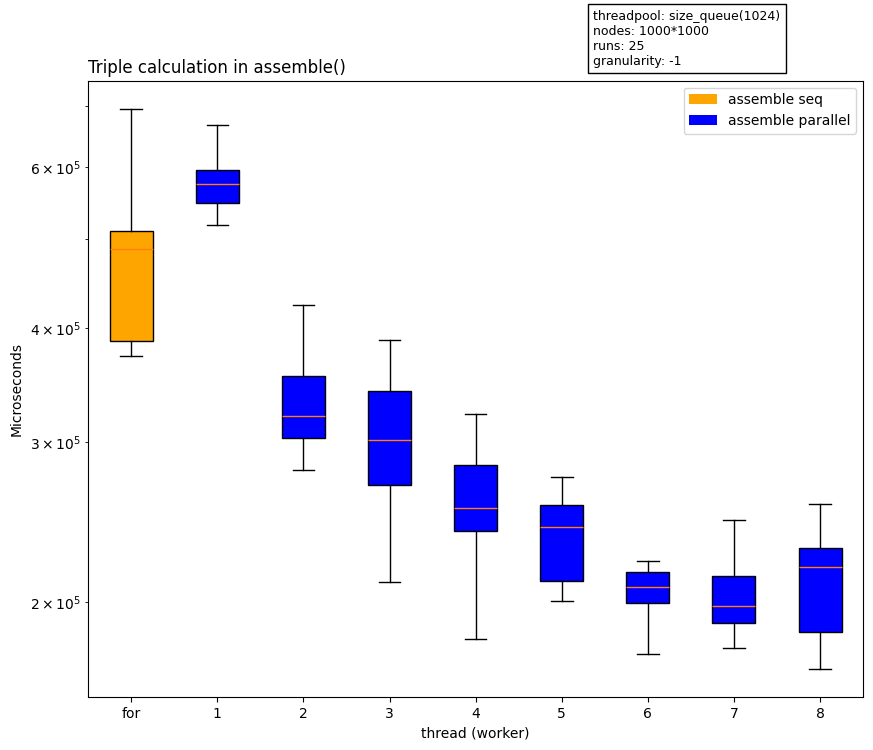

In [41]:
plot_boxplot(dati_assemble, dati_assemble_parallel,"Triple calculation in assemble()")

1 threads -> speedup: 0.85
2 threads -> speedup: 1.53
3 threads -> speedup: 1.62
4 threads -> speedup: 1.92
5 threads -> speedup: 2.02
6 threads -> speedup: 2.35
7 threads -> speedup: 2.46
8 threads -> speedup: 2.23


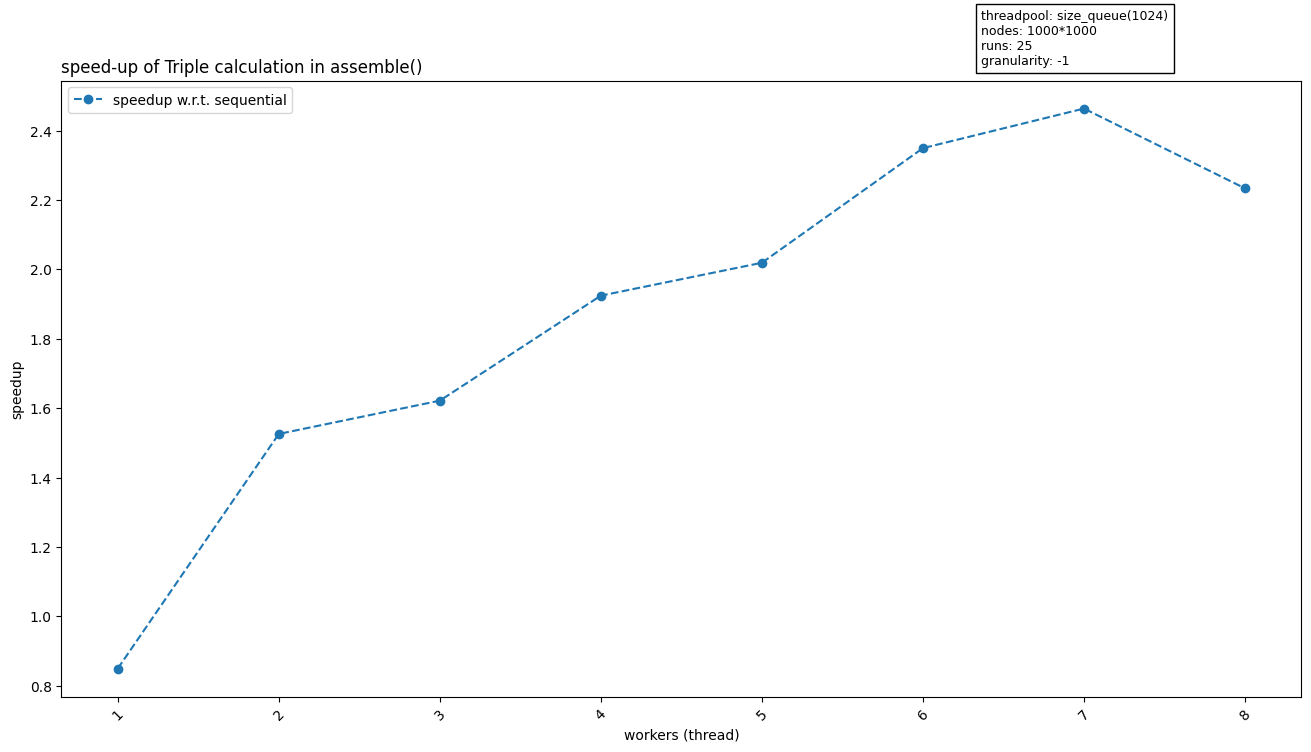

In [42]:
import copy
data_list = []
data_list.append(copy.deepcopy(dati_assemble))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(dati_assemble_parallel[i]))
plot_speedup(data_list,"speed-up of Triple calculation in assemble()",n_threads)

## Effetto di granularity

In [56]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'iterazioni per job',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes : {nodi}x{nodi}\nruns: {len(data_par_for_n[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [63]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes: {nodi}x{nodi}\nruns:{len(data_list[1])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [71]:
#parametri
nodi = 500 # tot_celle = (nodi-1)^2, granularity di partenza quindi tot_celle/n_thread
n_thread = 4
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = [62250,6000,600,60] # granularity

In [57]:
#run manualmente seq,  runs nodi
!./run_calcolo_triple.sh 5 500

In [70]:
#run parallel fix thread cambia gran a mano, runs nodi thread granularity
!./run_calcolo_triple_parallel_fixthread_granularity.sh 5 500 6 100

^C


In [72]:
dati_seq = []
dati_seq =np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 94632.00
62250: 53660.00
6000: 52081.00
600: 55985.00
60: 589855.00



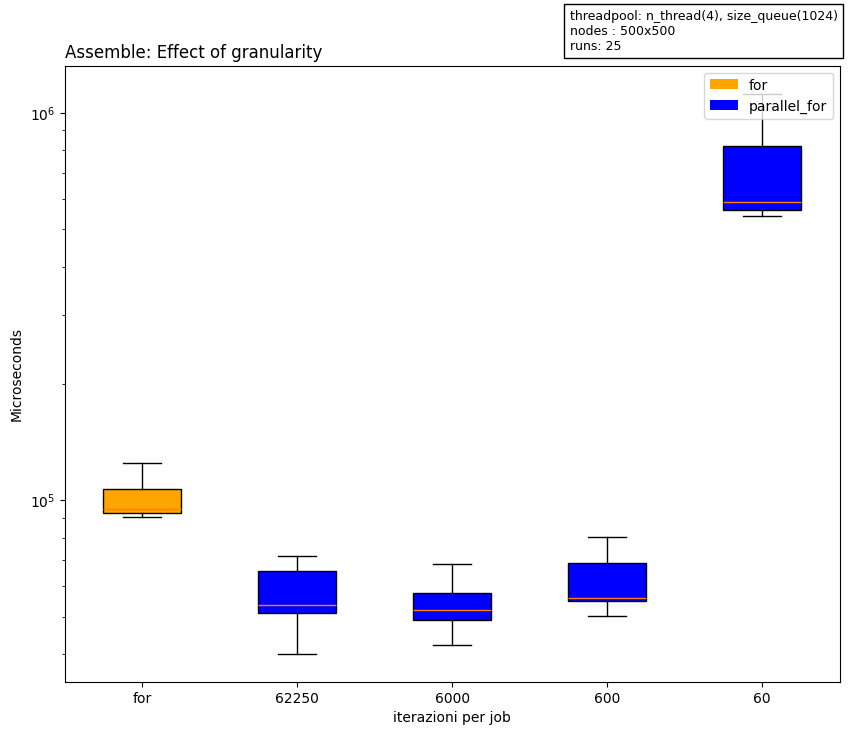

In [73]:
plot_granularity(dati_seq,dati_par,"Assemble: Effect of granularity")


=== Speedup values ===
Granularity 60: speedup = 0.16
Granularity 600: speedup = 1.69
Granularity 6000: speedup = 1.82
Granularity 62250: speedup = 1.76



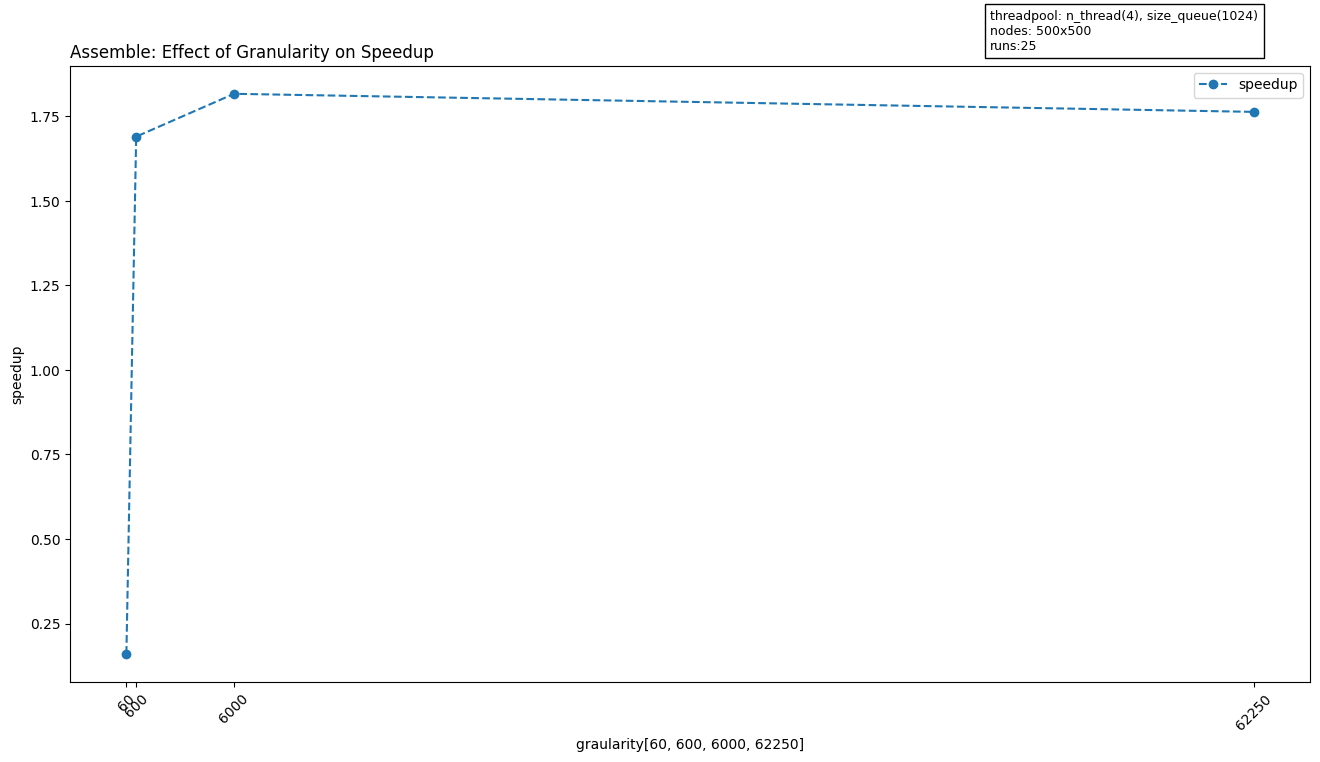

In [74]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Assemble: Effect of Granularity on Speedup",granularity)